# 线性回归示例 - 重点展示梯度下降法(GD)


Training a Linear Regression Model in PyTorch, source: https://machinelearningmastery.com/training-a-linear-regression-model-in-pytorch/

You’ll learn:

    How you can build a simple linear regression model from scratch in PyTorch.
    How you can apply a simple linear regression model on a dataset.
    How a simple linear regression model can be trained on a single learnable parameter.
    How a simple linear regression model can be trained on two learnable parameters.

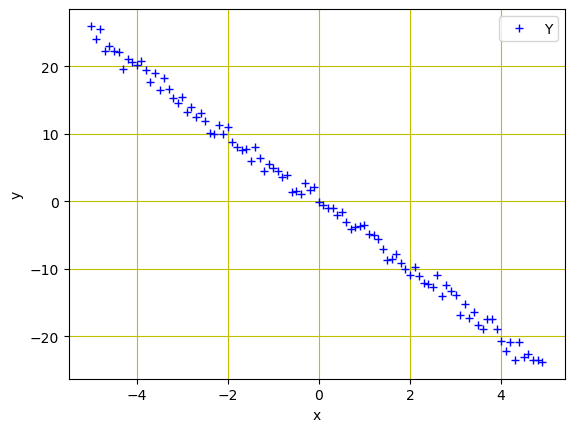

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Creating a function f(X) with a slope of -5
X = torch.arange(-5, 5, 0.1).view(-1, 1)
Y = -5 * X + torch.randn(X.size())

# Plot and visualizing the data points in blue
plt.plot(X.numpy(), Y.numpy(), 'b+', label='Y')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid('True', color='y')
plt.show()

构造一个单参数的线性回归模型（过原点）  
$h = wx$

In [4]:
# defining the function for forward pass for prediction
def forward(x):
    return w * x

# MSE (Mean Square Error) as the cost function
def criterion(y_pred, y):
    return torch.mean((y_pred - y) ** 2)

In [8]:
w = torch.tensor(99.99, requires_grad=True) 

alpha = 0.1 # learning rate
loss_list = []
iter = 20

# GD
for i in range (iter):
    # making predictions with forward pass
    Y_pred = forward(X)
    # calculating the loss between original and predicted data points
    loss = criterion(Y_pred, Y)
    # storing the calculated loss in a list
    loss_list.append(loss.item())
    # backward pass for computing the gradients of the loss w.r.t to learnable parameters
    loss.backward()
    # updateing the parameters after each iteration
    w.data = w.data - alpha * w.grad.data
    # zeroing gradients after each iteration
    w.grad.data.zero_()
    # priting the values for understanding
    print('{},\t{},\t{}'.format(i, loss.item(), w.item()))

0,	91813.7578125,	-74.96837615966797
1,	40847.390625,	41.728851318359375
2,	18173.001953125,	-36.108184814453125
3,	8085.423828125,	15.809112548828125
4,	3597.57275390625,	-18.819721221923828
5,	1600.9771728515625,	4.277708053588867
6,	712.714111328125,	-11.128276824951172
7,	317.5357666015625,	-0.8524847030639648
8,	141.72525024414062,	-7.7064385414123535
9,	63.50912094116211,	-3.1348509788513184
10,	28.711591720581055,	-6.184099197387695
11,	13.230550765991211,	-4.150251388549805
12,	6.3432111740112305,	-5.506827354431152
13,	3.279110908508301,	-4.601991653442383
14,	1.9159274101257324,	-5.205516815185547
15,	1.3094631433486938,	-4.8029656410217285
16,	1.0396538972854614,	-5.07146692276001
17,	0.919618546962738,	-4.892376899719238
18,	0.8662164807319641,	-5.011829853057861
19,	0.8424584865570068,	-4.932154655456543


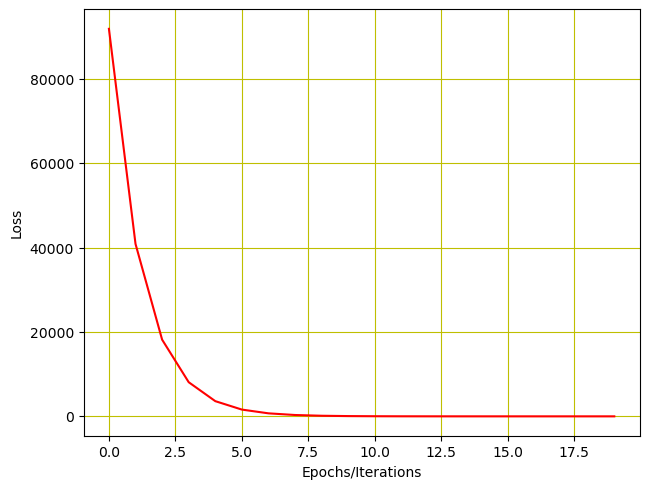

In [9]:
# Plotting the loss after each iteration
plt.plot(loss_list, 'r')
plt.tight_layout()
plt.grid('True', color='y')
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.show()

## 扩展到两个参数

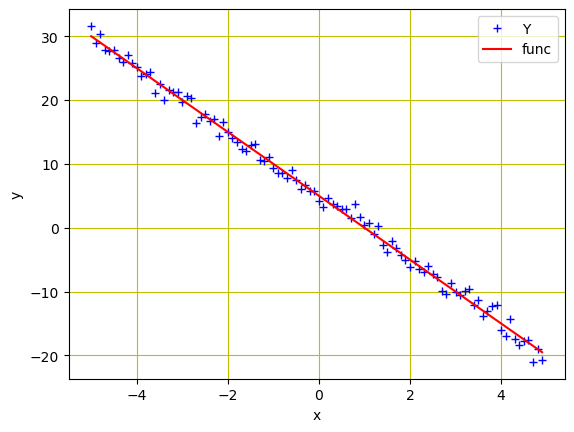

0, 	83491.4609375, 	56.663482666015625, 	-79.14111328125
1, 	39288.12109375, 	-46.96546173095703, 	-61.69737243652344
2, 	18849.962890625, 	22.329483032226562, 	-48.77866744995117
3, 	9263.431640625, 	-23.761062622070312, 	-37.750755310058594
4, 	4682.70166015625, 	7.091611862182617, 	-29.38932991027832
5, 	2442.791748046875, 	-13.403509140014648, 	-22.39166259765625
6, 	1317.0445556640625, 	0.3367128372192383, 	-16.99848175048828
7, 	733.5147094726562, 	-8.774083137512207, 	-12.546533584594727
8, 	420.9862976074219, 	-2.652662754058838, 	-9.076083183288574
9, 	248.07510375976562, 	-6.700944900512695, 	-6.238508224487305
10, 	149.47036743164062, 	-3.972365379333496, 	-4.008931636810303
11, 	91.72673034667969, 	-5.770031929016113, 	-2.197984218597412
12, 	57.155879974365234, 	-4.5528788566589355, 	-0.7672033309936523
13, 	36.09088897705078, 	-5.350412368774414, 	0.3895930051803589
14, 	23.08051109313965, 	-4.806889533996582, 	1.3070547580718994
15, 	14.963151931762695, 	-5.1602444648742

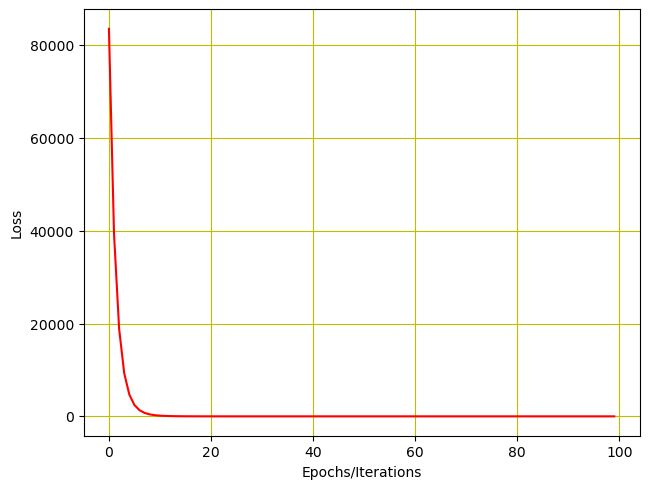

The final model:  Y =  -4.996739387512207 X+ 4.994584083557129


In [16]:
import numpy as np
import matplotlib.pyplot as plt
 
X = torch.arange(-5, 5, 0.1).view(-1, 1)
func = -5 * X + 5
Y = func + torch.randn(X.size())

# Plot and visualizing the data points in blue
plt.plot(X.numpy(), Y.numpy(), 'b+', label='Y')
plt.plot(X.numpy(), func.numpy(), 'r', label='func')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid('True', color='y')
plt.show()

# defining the function for forward pass for prediction
def forward(x):
    return w * x + b
 
# evaluating data points with Mean Square Error.
def criterion(y_pred, y):
    return torch.mean((y_pred - y) ** 2)
 
w = torch.tensor(-99.0, requires_grad=True)
b = torch.tensor(-99.0, requires_grad=True)
 
alpha = 0.1
loss_list = []
iter = 100
 
for i in range (iter):    
    # making predictions with forward pass
    Y_pred = forward(X)
    # calculating the loss between original and predicted data points
    loss = criterion(Y_pred, Y)
    # storing the calculated loss in a list
    loss_list.append(loss.item())
    # backward pass for computing the gradients of the loss w.r.t to learnable parameters
    loss.backward()
    # updateing the parameters after each iteration
    w.data = w.data - alpha * w.grad.data
    b.data = b.data - alpha * b.grad.data
    # zeroing gradients after each iteration
    w.grad.data.zero_()
    b.grad.data.zero_()
    # priting the values for understanding
    print('{}, \t{}, \t{}, \t{}'.format(i, loss.item(), w.item(), b.item()))
 
# Plotting the loss after each iteration
plt.plot(loss_list, 'r')
plt.tight_layout()
plt.grid('True', color='y')
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.show()

print('The final model: ', 'Y = ', w.item() ,'X+', b.item()) 